In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest



In [175]:
center_info = pd.read_csv('/content/drive/MyDrive/meal forecasting system/DATA/fulfilment_center_info.csv')
data = pd.read_csv('/content/drive/MyDrive/meal forecasting system/DATA/train.csv')
meal_info = pd.read_csv('/content/drive/MyDrive/meal forecasting system/DATA/meal_info.csv')



In [176]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
data=data.merge(center_info,on='center_id', sort=False)
data=data.merge(meal_info,on='meal_id', sort=False)
data = data.sort_values(by=['week'])

In [179]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai


In [180]:
data.isna().sum()

,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0
city_code,0


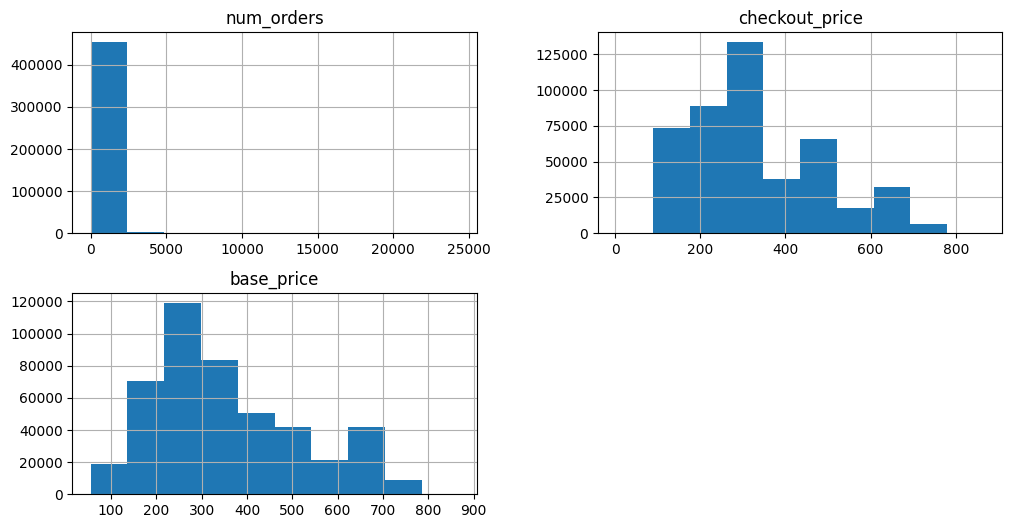

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
data[['num_orders', 'checkout_price', 'base_price']].hist(figsize=(12, 6))
plt.show()


In [181]:
data['discount'] = data['base_price'] - data['checkout_price']

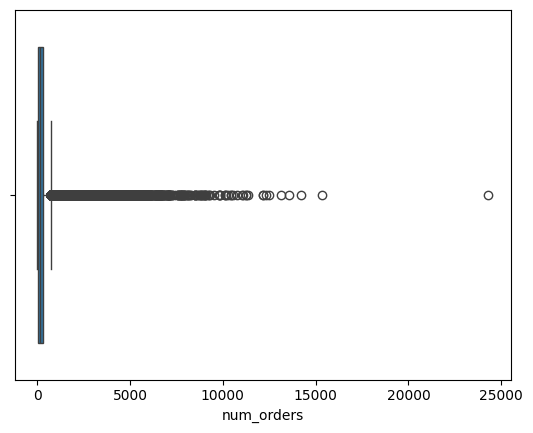

In [9]:
sns.boxplot(x=data['num_orders'])
plt.show()

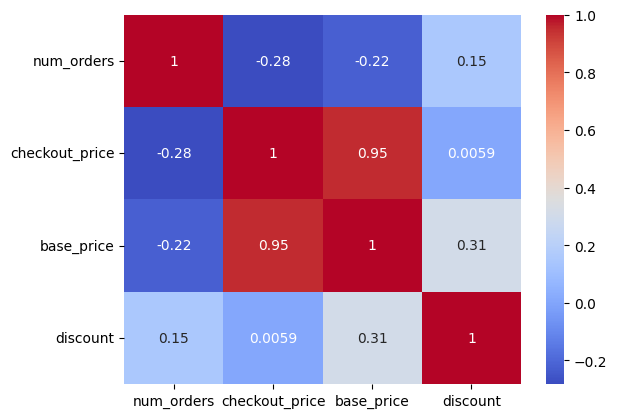

In [182]:
corr = data[['num_orders', 'checkout_price', 'base_price', 'discount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [183]:
numerical_features=['checkout_price', 'base_price', 'discount']

In [12]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,15.46
299714,1102584,1,11,1525,242.50,282.33,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai,39.83
299851,1026447,1,83,1525,244.50,281.33,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai,36.83
299996,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.00
31140,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364068,1126639,145,39,1247,446.23,446.23,0,0,14,526,34,TYPE_C,3.8,Biryani,Indian,0.00
243852,1476913,145,75,1558,548.08,549.08,0,0,175,651,77,TYPE_B,4.7,Pizza,Continental,1.00
130329,1193828,145,97,2290,272.60,271.60,0,0,473,628,77,TYPE_A,4.6,Rice Bowl,Indian,-1.00
26604,1188974,145,27,2539,158.14,158.14,0,0,244,713,85,TYPE_A,4.5,Beverages,Thai,0.00


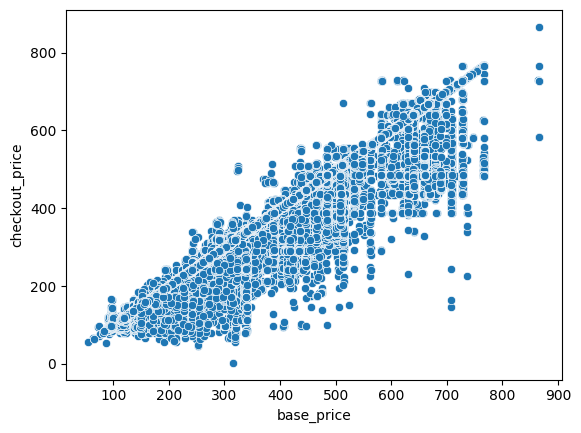

In [109]:
sns.scatterplot(x=data['base_price'], y=data['checkout_price'])
plt.show()

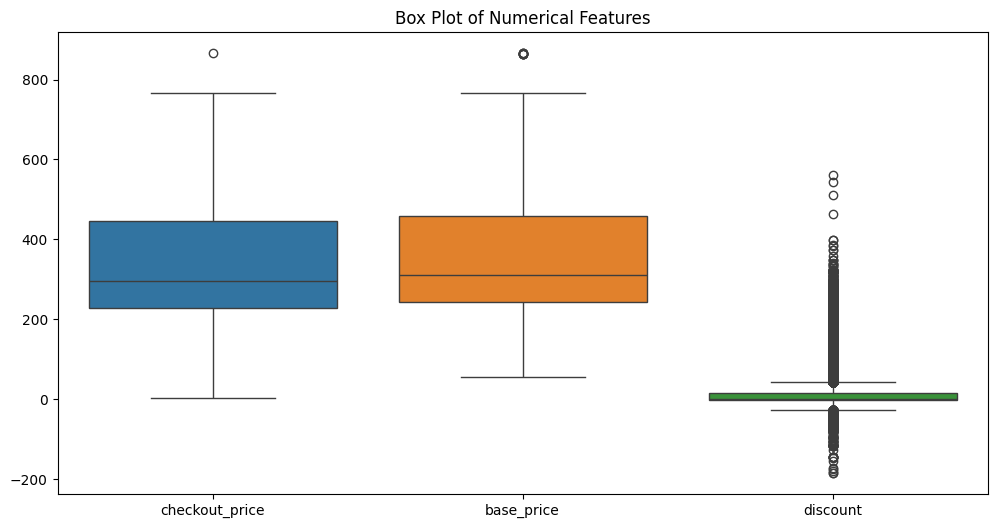

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.show()


In [184]:
numerical_features=['num_orders', 'checkout_price', 'base_price', 'discount']
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[feature] >= (Q1 - 1.5 * IQR)) & (df[feature] <= (Q3 + 1.5 * IQR))]
    return df

data = remove_outliers(data, numerical_features)

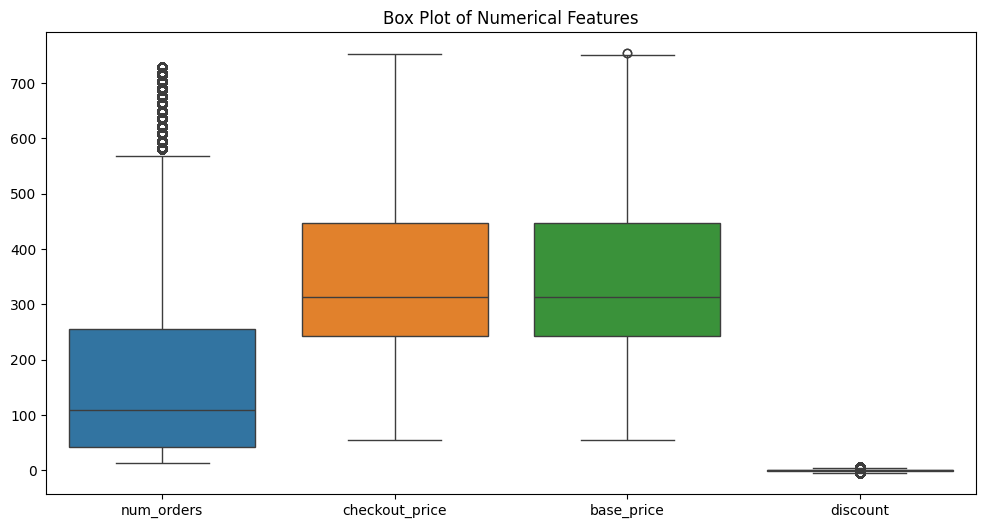

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.show()


### Feature Engineering

In [209]:
df2=data.copy()

In [210]:
data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,discount,ewma_10
0,1177435,1,32,1525,249.29,251.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai,2.0,185.379827
1,1108310,1,43,2539,133.86,135.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai,2.0,185.379827
2,1252664,1,186,1525,282.33,280.33,0,0,14,649,34,TYPE_A,3.4,Other Snacks,Thai,-2.0,185.379827
3,1389738,1,80,2539,135.83,134.83,0,0,269,604,56,TYPE_C,5.1,Beverages,Thai,-1.0,185.379827
4,1418622,1,101,2539,133.89,132.89,0,0,121,699,85,TYPE_C,2.8,Beverages,Thai,-1.0,185.379827


In [212]:
# Base Price Features
df2['base_price_max'] = df2.groupby('meal_id')['base_price'].transform('max')
df2['base_price_mean'] = df2.groupby('meal_id')['base_price'].transform('mean')
df2['base_price_min'] = df2.groupby('meal_id')['base_price'].transform('min')


In [217]:
df2['center_cat_count'] = df2.groupby(['center_id', 'category'])['num_orders'].transform('count')
df2['center_cat_price_rank'] = df2.groupby(['center_id', 'category'])['checkout_price'].rank(method='min')

df2['center_cat_week_count'] = df2.groupby(['center_id', 'category', 'week'])['num_orders'].transform('count')
df2['center_cui_count'] = df2.groupby(['center_id', 'cuisine'])['num_orders'].transform('count')
df2['center_price_rank'] = df2.groupby('center_id')['checkout_price'].rank(method='min')
df2['center_week_count'] = df2.groupby(['center_id', 'week'])['num_orders'].transform('count')
df2['center_week_price_rank'] = df2.groupby(['center_id', 'week'])['checkout_price'].rank(method='min')


In [215]:
print(df2.columns)


Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine',
       'discount', 'ewma_10', 'base_price_max', 'base_price_mean',
       'base_price_min', 'center_cat_count', 'center_cat_price_rank',
       'center_cat_week_count', 'center_cui_count', 'center_price_rank',
       'center_week_count', 'center_week_price_rank'],
      dtype='object')


In [218]:
df2['city_meal_week_count'] = df2.groupby(['city_code', 'meal_id', 'week'])['num_orders'].transform('count')
df2['meal_count'] = df2.groupby('meal_id')['num_orders'].transform('sum')
df2['meal_city_price_rank'] = df2.groupby(['city_code', 'meal_id'])['checkout_price'].rank(method='min')
df2['meal_price_max'] = df2.groupby('meal_id')['checkout_price'].transform('max')
df2['meal_price_mean'] = df2.groupby('meal_id')['checkout_price'].transform('mean')
df2['meal_price_min'] = df2.groupby('meal_id')['checkout_price'].transform('min')
df2['meal_price_rank'] = df2.groupby('meal_id')['checkout_price'].rank(method='min')
df2['meal_region_price_rank'] = df2.groupby(['region_code', 'meal_id'])['checkout_price'].rank(method='min')
df2['meal_week_count'] = df2.groupby(['meal_id', 'week'])['num_orders'].transform('sum')
df2['meal_week_price_rank'] = df2.groupby(['meal_id', 'week'])['checkout_price'].rank(method='min')

df2['region_meal_count'] = df2.groupby(['region_code', 'meal_id'])['num_orders'].transform('sum')
df2['region_meal_week_count'] = df2.groupby(['region_code', 'meal_id', 'week'])['num_orders'].transform('sum')
df2['type_meal_week_count'] = df2.groupby(['center_id', 'category', 'week'])['num_orders'].transform('sum')


In [219]:
numerical_features = ['checkout_price', 'base_price', 'discount']

In [137]:
numerical_features

['checkout_price', 'base_price', 'discount']

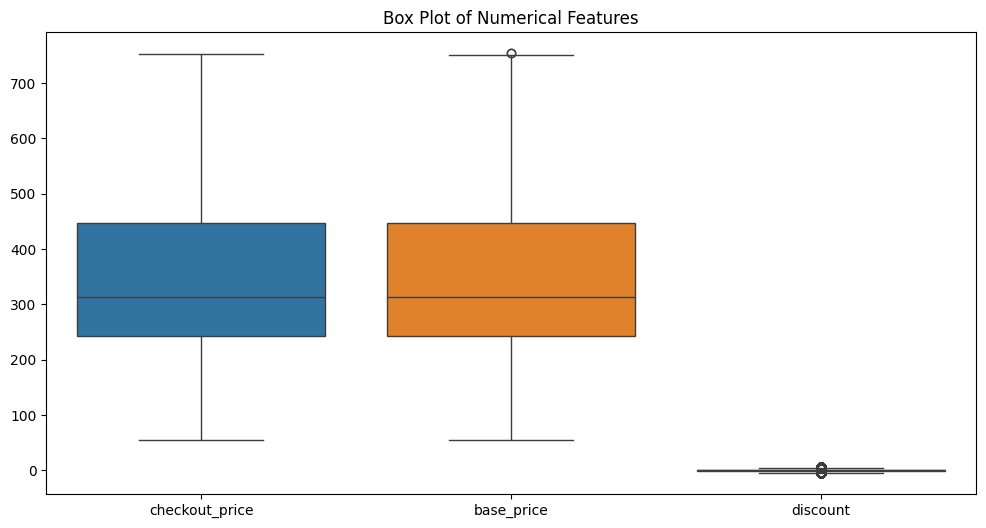

In [138]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_features])
plt.title('Box Plot of Numerical Features')
plt.show()


In [220]:
numerical_features=['checkout_price', 'base_price','discount','op_area',
                     'base_price_max', 'base_price_mean', 'base_price_min',
                     'meal_price_max', 'meal_price_mean', 'meal_price_min']


In [221]:

from sklearn.preprocessing import QuantileTransformer
skewness = df2[numerical_features].apply(lambda x: x.skew())
print("Skewness before transformation:\n", skewness)

Skewness before transformation:
 checkout_price     0.628800
base_price         0.628811
discount           0.044819
op_area            0.653180
base_price_max     0.396708
base_price_mean    0.616014
base_price_min     0.546287
meal_price_max     0.397200
meal_price_mean    0.616013
meal_price_min     0.546168
dtype: float64


In [222]:
quantile_transformer2 = QuantileTransformer(output_distribution='normal')
df2[numerical_features] = quantile_transformer2.fit_transform(df2[numerical_features])

In [223]:

features_to_scale = [ 'checkout_price', 'base_price','op_area',
                     'base_price_max', 'base_price_mean', 'base_price_min',
                     'meal_price_max', 'meal_price_mean', 'meal_price_min']

# Initialize StandardScaler
scaler2 = StandardScaler()

# Fit and transform features
df2[features_to_scale] = scaler2.fit_transform(df2[features_to_scale])

In [224]:
df2.drop(['id','base_price'],axis=1,inplace=True)
df2.set_index('week',inplace=True,drop=False)

In [225]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['center_id','meal_id','category', 'cuisine', 'center_type', 'city_code', 'region_code']


In [226]:

encoding_mappings = {}

# Apply Label Encoding and store the mappings
for col in columns_to_encode:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col])
    encoding_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the DataFrame with the encoded columns
print(df2)

# Display the mappings of categorical values to numerical values
for col, mapping in encoding_mappings.items():
    print(f"\nLabel encoding mapping for {col}:")
    print(mapping)

      week  center_id  meal_id  checkout_price  emailer_for_promotion  \
week                                                                    
1        1         12       11       -0.650290                      0   
1        1         18       38       -1.753290                      0   
1        1         76       11       -0.391684                      0   
1        1         39       38       -1.747811                      0   
1        1         51       38       -1.753206                      0   
...    ...        ...      ...             ...                    ...   
145    145         15        6        0.613321                      0   
145    145         36       13        1.049596                      0   
145    145         49       30       -0.576588                      0   
145    145          9       38       -1.278970                      0   
145    145         27       27        1.093879                      0   

      homepage_featured  num_orders  city_code  re

In [227]:
X2=df2.drop('num_orders',axis=1)
y2=df2['num_orders']

In [228]:
x_train2=X2.loc[X2['week']<118]
y_train2=y2.loc[X2['week']<118]
x_test2=X2.loc[X2['week']>=117]
y_test2=y2.loc[X2['week']>=117]

### XGBOOST 2

In [229]:
import xgboost as xgb

from sklearn.metrics import mean_squared_error

xgb_reg2 = xgb.XGBRegressor(
    max_depth=9,
    n_estimators=100,
    learning_rate=0.1,
    tree_method='exact'
)

In [230]:
xgb_reg2.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [231]:
y_pred2 = xgb_reg2.predict(x_test2)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test2, y_pred2)
mae = mean_absolute_error(y_test2, y_pred2)
r2 = r2_score(y_test2, y_pred2)
mape = np.mean(np.abs((y_test2 - y_pred2) / y_test2)) * 100

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


Mean Squared Error (MSE): 3261.1232872154064
Mean Absolute Error (MAE): 37.384036346289584
R² Score: 0.8811705702699626
Mean Absolute Percentage Error (MAPE): 35.76514123475965%


In [234]:
import pickle


with open('/content/drive/MyDrive/meal forecasting system/models/xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb_reg2, file)


import json

params = xgb_reg2.get_params()


with open('/content/drive/MyDrive/meal forecasting system/models/xgb_reg_params.json', 'w') as file:
    json.dump(params, file, indent=4)

In [235]:
with open('/content/drive/MyDrive/meal forecasting system/models/xbg_scaler.pkl', 'wb') as file:
    pickle.dump(scaler2, file)


scaler_data = {
    'mean_': scaler2.mean_.tolist(),
    'scale_': scaler2.scale_.tolist()
}

with open('/content/drive/MyDrive/meal forecasting system/models/xbg_scaler.json', 'w') as file:
    json.dump(scaler_data, file, indent=4)

In [236]:
with open('/content/drive/MyDrive/meal forecasting system/models/quantile_transformer.pkl', 'wb') as file:
    pickle.dump(quantile_transformer2, file)
quantile_transformer_data = {
    'n_quantiles_': quantile_transformer2.n_quantiles_,
    'quantiles_': quantile_transformer2.quantiles_.tolist(),
    'references_': quantile_transformer2.references_.tolist(),
    'output_distribution': quantile_transformer2.output_distribution,
}

with open('/content/drive/MyDrive/meal forecasting system/models/quantile_transformer.json', 'w') as file:
    json.dump(quantile_transformer_data, file, indent=4)



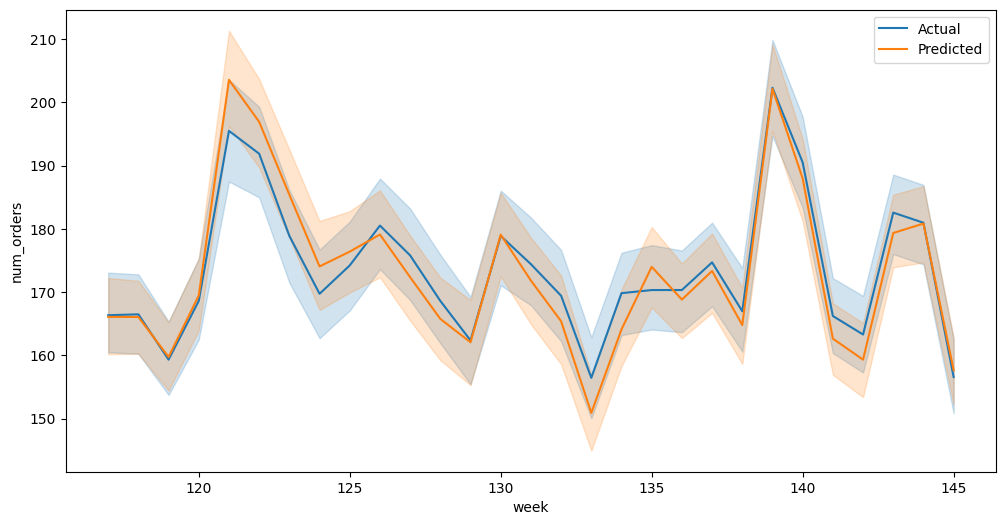

In [237]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=y_test2.index, y=y_test2, label='Actual')
sns.lineplot(x=y_test2.index, y=y_pred2, label='Predicted')
plt.legend()
plt.show()

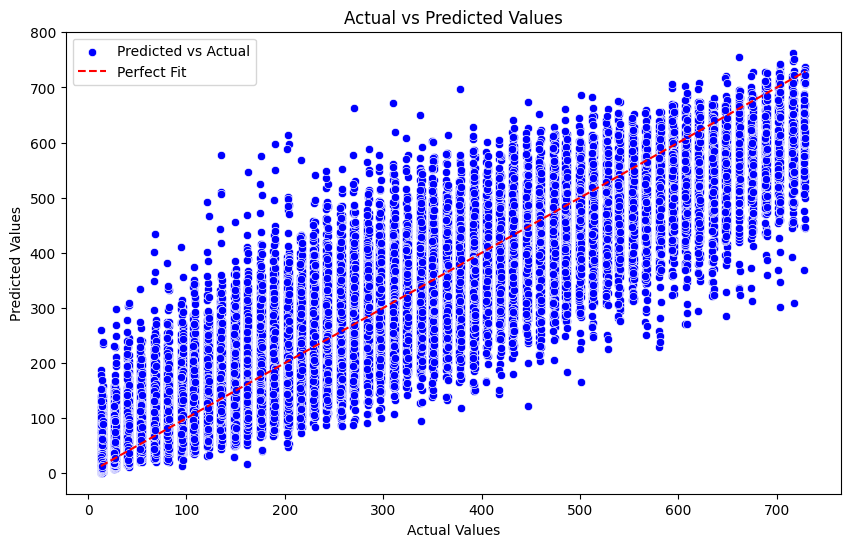

In [238]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=y_pred2, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], color='red', label='Perfect Fit', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


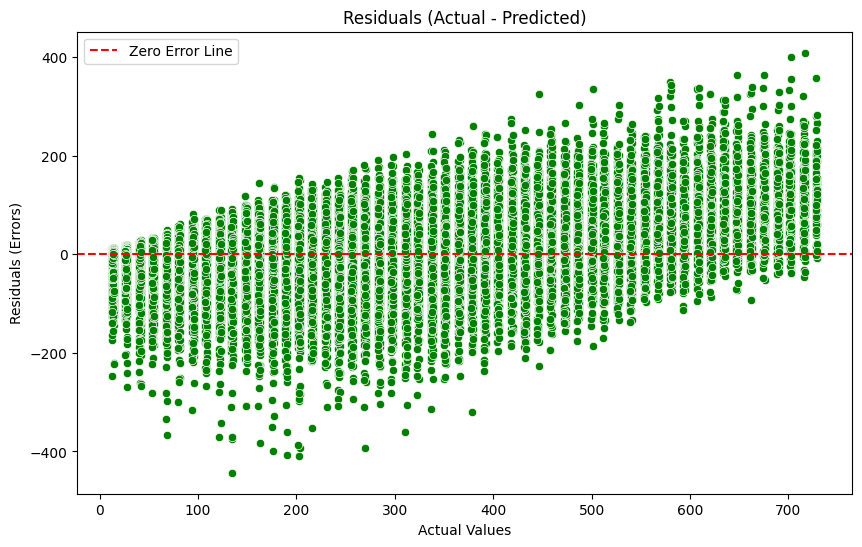

In [239]:
residuals = y_test2 - y_pred2

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=residuals, color='green')
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Errors)')
plt.title('Residuals (Actual - Predicted)')
plt.legend()
plt.show()